In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
df = pd.read_csv('./01_linear_regression/homeprice.csv')
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


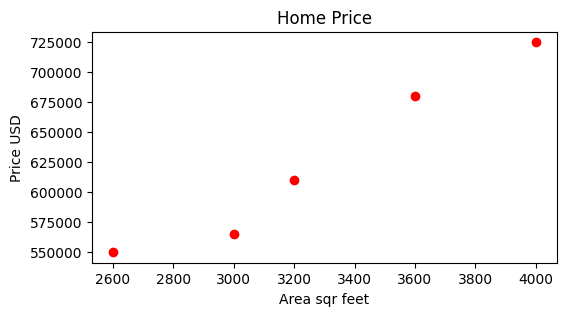

In [5]:
%matplotlib inline
plt.figure(figsize=(6,3))
plt.xlabel("Area sqr feet")
plt.ylabel("Price USD")
plt.title("Home Price")
plt.scatter(df.area,df.price,color="red")

In [6]:
model = linear_model.LinearRegression()

In [7]:
model.fit(df[['area']],df.price)

LinearRegression()

In [8]:
model.coef_,model.intercept_

(array([135.78767123]), 180616.43835616432)

In [9]:
y_predicted = model.predict(df[['area']])

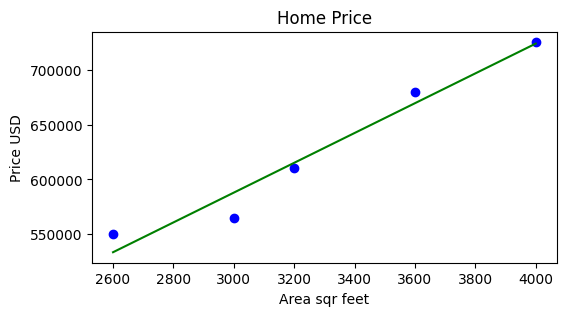

In [11]:
%matplotlib inline
plt.figure(figsize=(6,3))
plt.xlabel("Area sqr feet")
plt.ylabel("Price USD")
plt.title("Home Price")
plt.plot(df.area,y_predicted,color="green")
plt.scatter(df.area,df.price,color="blue")

# Gradient Descent

In [13]:
def gradient_descent(x,y,iter,lr):
    m_curr = b_curr = 0
    iteration = iter
    n = len(x)
    learning_rate = lr
    for i in range(iteration):
        y_pred = m_curr*x+b_curr
        cost = (1/n)*sum([val**2 for val in (y-y_pred)])
        md = -(1/n)*sum(x*(y-y_pred))
        bd = -(1/n)*sum(y-y_pred)
        m_curr = m_curr-learning_rate*md
        b_curr = b_curr-learning_rate*bd
        print(f"m {m_curr}, b {b_curr}, iteration {i}")
        print(f"Cost = {cost}")

In [14]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,8,11,15])

In [18]:
gradient_descent(x,y,10000,.01)

m 0.324, b 0.09200000000000001, iteration 0
Cost = 96.80000000000001
m 0.6096, b 0.17336000000000001, iteration 1
Cost = 75.454048
m 0.8613432000000001, b 0.2453384, iteration 2
Cost = 58.85996498560001
m 1.083235296, b 0.30904472000000005, iteration 3
Cost = 45.95988157579648
m 1.2788080718400001, b 0.3654572139200001, iteration 4
Cost = 35.93143327414079
m 1.4511754675200002, b 0.4154383996256001, iteration 5
Cost = 28.135331924919015
m 1.6030830141040322, b 0.45974875160374407, iteration 6
Cost = 22.074608911141876
m 1.7369514200044764, b 0.4990587736645857, iteration 7
Cost = 17.36293170905756
m 1.8549150005940465, b 0.5339596433278055, iteration 8
Cost = 13.699973871358758
m 1.9588555612288672, b 0.5649725968767061, iteration 9
Cost = 10.852268191417409
m 2.0504322715873906, b 0.592557204071073, iteration 10
Cost = 8.638322372392592
m 2.1311080055906455, b 0.6171186638827406, iteration 11
Cost = 6.91704827429671
m 2.2021725650591923, b 0.6390142370761939, iteration 12
Cost = 5.578

# Save and Load train model

In [19]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


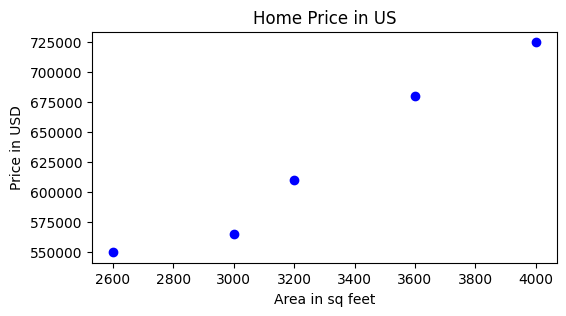

In [22]:
%matplotlib inline
plt.figure(figsize=(6,3))
plt.xlabel("Area in sq feet")
plt.ylabel("Price in USD")
plt.title("Home Price in US")
plt.scatter(df.area,df.price,color="blue")
plt.show()

In [23]:
model2 = linear_model.LinearRegression()

In [24]:
model2.fit(df[['area']],df.price)

LinearRegression()

In [25]:
df.shape

(5, 2)

In [27]:
y_pred2 = model2.predict(df[['area']])

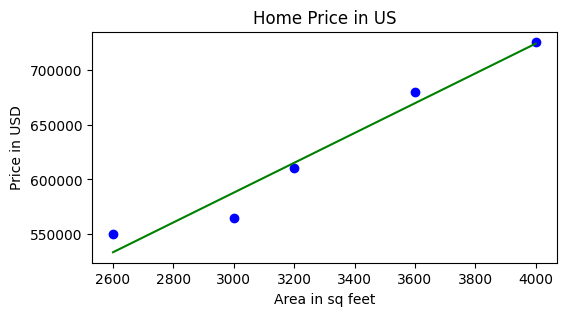

In [28]:
%matplotlib inline
plt.figure(figsize=(6,3))
plt.xlabel("Area in sq feet")
plt.ylabel("Price in USD")
plt.title("Home Price in US")
plt.scatter(df.area,df.price,color="blue")
plt.plot(df['area'],y_pred2,color="green")
plt.show()

In [29]:
import pickle

In [30]:
with open("model_pickle2","wb") as f:
    pickle.dump(model2,f)

In [31]:
model3 = None
with open("model_pickle2","rb") as f:
    model3 = pickle.load(f)

In [32]:
model3.predict([[3600]])

c:\Users\Ali Neaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([669452.05479452])

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
model3.predict([[3600]])

array([669452.05479452])

# Dummy Variables

In [35]:
df = pd.read_csv('./03_dummy_variables/homeprices.csv')

In [36]:
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [37]:
df.shape

(13, 3)

In [39]:
df.isna().sum()

town     0
area     0
price    0
dtype: int64

In [40]:
df.town.unique()

array(['monroe township', 'west windsor', 'robinsville'], dtype=object)

In [42]:
len(df.town.unique())

3

In [43]:
dummies = pd.get_dummies(df.town)
dummies.head()

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [47]:
merged = pd.concat([df,dummies],axis=1)

In [48]:
merged.head()

,town,area,price,monroe township,robinsville
0,monroe township,2600,550000,1,0
1,monroe township,3000,565000,1,0
2,monroe township,3200,610000,1,0
3,monroe township,3600,680000,1,0
4,monroe township,4000,725000,1,0


In [49]:
final = merged.drop(['town'],axis=1)

In [50]:
final.head()

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0


In [51]:
X = final.drop(['price'],axis=1)
y = final.price

In [52]:
model = linear_model.LinearRegression()

In [53]:
model.fit(X,y)

LinearRegression()

In [54]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [55]:
model.intercept_

249790.36766292527

In [56]:
model.predict([[2600,1,0]])

array([539709.7398409])

In [57]:
model.predict([[2600,0,0]])

array([579723.71533005])

In [58]:
model.predict([[2600,0,1]])

array([565396.15136531])

# Train Test Split

In [59]:
from sklearn.datasets import load_iris

In [60]:
iris = load_iris()

In [61]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [65]:
df = pd.DataFrame(df)

In [63]:
target = iris.target

In [66]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
df.shape

(150, 4)

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=True)

In [71]:
len(X_train),len(X_test)

(9, 4)

In [72]:
X_train.head()

,area,monroe township,robinsville
1,3000,1,0
6,2800,0,0
0,2600,1,0
7,3300,0,0
12,3600,0,1


In [73]:
X_train.shape,X_test.shape

((9, 3), (4, 3))

In [74]:
 from sklearn.linear_model import LinearRegression

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train,y_train)

LinearRegression()

In [77]:
model.score(X_test,y_test)

0.7801783023071712